In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle as pkl

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import uniform

# Load data

In [35]:
df = pd.read_csv("../data/heart_disease.csv")
X = df.drop("num", axis=1)
y = df["num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
df

,PC1,PC2,PC4,PC5,PC6,PC7,PC11,num
0,0.675205,0.344930,-0.087400,-0.438102,1.117363,-0.144715,-0.052244,0.0
1,3.544619,0.506039,-0.653609,0.713136,-1.170823,0.391445,0.053414,2.0
2,2.386927,-1.237065,-0.018786,0.465064,0.576870,-0.705147,0.092074,1.0
3,-1.344182,-0.262477,2.743671,0.313740,1.221851,0.702343,-0.377414,0.0
4,-1.755805,-0.296602,0.764861,0.245258,0.185786,0.279775,0.480802,0.0
...,...,...,...,...,...,...,...,...
298,-0.622619,-1.052430,0.766006,-1.006978,-0.233717,0.353068,0.633262,1.0
299,2.566185,-0.885424,-0.090710,1.081507,0.992006,-0.348138,0.261857,2.0
300,0.905604,-2.366826,-1.188388,-0.033922,-0.595107,-0.390816,0.015781,3.0
301,-0.777244,0.692779,-0.656726,0.792481,0.273470,-0.046283,0.921933,1.0


# GridSearchCV

In [37]:
# Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
}
grid_lr = GridSearchCV(LogisticRegression(random_state=30, max_iter=200), param_grid_lr, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Best Logistic Regression:", grid_lr.best_params_)
print("Cross-Validated Best Score (Logistic Regression):", grid_lr.best_score_)


Best Logistic Regression: {'C': 5, 'solver': 'lbfgs'}
Cross-Validated Best Score (Logistic Regression): 0.5704081632653061


c:\Users\mhame\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mhame\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [38]:
# Decision Tree
param_grid_dt = {
    'max_depth': [2, 3, 5, 7, 10, 12, None],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=30), param_grid_dt, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print("Best Decision Tree:", grid_dt.best_params_)
print("Cross-Validated Best Score (Logistic Regression):", grid_dt.best_score_)


Best Decision Tree: {'max_depth': 2, 'min_samples_split': 2}
Cross-Validated Best Score (Logistic Regression): 0.533078231292517


In [39]:
# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 3, 4, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=30), param_grid_rf, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Best Random Forest:", grid_rf.best_params_)
print("Cross-Validated Best Score (Random Forest):", grid_rf.best_score_)

Best Random Forest: {'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validated Best Score (Random Forest): 0.6118197278911566


In [40]:
# SVM
param_grid_svm = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(probability=True, random_state=30), param_grid_svm, scoring='accuracy')
grid_svm.fit(X_train, y_train)
print("Best SVM:", grid_svm.best_params_)
print("Cross-Validated Best Score (SVM):", grid_svm.best_score_)

Best SVM: {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validated Best Score (SVM): 0.5911564625850341


# RandomizedSearchCV

In [41]:
# Logistic Regression
param_dist_lr = {
    'C': uniform(0.001, 10),
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
}
rand_lr = RandomizedSearchCV(LogisticRegression(random_state=30, max_iter=200), param_dist_lr, n_iter=10, scoring='accuracy', random_state=30)
rand_lr.fit(X_train, y_train)
print("Best Logistic Regression (Randomized):", rand_lr.best_params_)
print("Best Score (Logistic Regression):", rand_lr.best_score_)

Best Logistic Regression (Randomized): {'C': np.float64(2.183569031644456), 'solver': 'lbfgs'}
Best Score (Logistic Regression): 0.5744897959183674


In [42]:
# Decision Tree
param_dist_dt = {
    'max_depth': [2, 3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 15, 20]
}
rand_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=30), param_dist_dt, n_iter=10, scoring='accuracy', random_state=30)
rand_dt.fit(X_train, y_train)
print("Best Decision Tree (Randomized):", rand_dt.best_params_)
print("Best Score (Decision Tree):", rand_dt.best_score_)

Best Decision Tree (Randomized): {'min_samples_split': 2, 'max_depth': 2}
Best Score (Decision Tree): 0.533078231292517


In [43]:
# Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10, 15]
}
rand_rf = RandomizedSearchCV(RandomForestClassifier(random_state=30), param_dist_rf, n_iter=20, scoring='accuracy', random_state=30)
rand_rf.fit(X_train, y_train)
print("Best Random Forest (Randomized):", rand_rf.best_params_)
print("Best Score (Random Forest):", rand_rf.best_score_)

Best Random Forest (Randomized): {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}
Best Score (Random Forest): 0.5994897959183673


In [44]:
# SVM
param_dist_svm = {
    'C': uniform(0.01, 50),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
rand_svm = RandomizedSearchCV(SVC(probability=True, random_state=30), param_dist_svm, n_iter=20, scoring='accuracy', random_state=30)
rand_svm.fit(X_train, y_train)
print("Best SVM (Randomized):", rand_svm.best_params_)
print("Best Score (SVM):", rand_svm.best_score_)

Best SVM (Randomized): {'C': np.float64(1.341218238655718), 'gamma': 'auto', 'kernel': 'rbf'}
Best Score (SVM): 0.5951530612244899


# Load baseline models

In [45]:
with open("../models/logistic_regression_model.pkl", "rb") as file:
    log_reg_model = pkl.load(file)

with open("../models/decision_tree_model.pkl", "rb") as file:
    dt_model = pkl.load(file)

with open("../models/random_forest_model.pkl", "rb") as file:
    rf_model = pkl.load(file)

with open("../models/svm_model.pkl", "rb") as file:
    svm_model = pkl.load(file)

# Compare models

## Organize models in a dictionary

In [46]:
# models[model_name][i]
# i = 0: baseline, 1: grid search, 2: randomized search

models = {
    "Logistic Regression": [log_reg_model, grid_lr.best_estimator_, rand_lr.best_estimator_],
    "Decision Tree": [dt_model, grid_dt.best_estimator_, rand_dt.best_estimator_],
    "Random Forest": [rf_model, grid_rf.best_estimator_, rand_rf.best_estimator_],
    "SVM": [svm_model, grid_svm.best_estimator_, rand_svm.best_estimator_]
}


## Test and score each model

In [53]:
metrics = pd.DataFrame(columns = ["accuracy", "roc_auc", "precision_weighted", "recall_weighted",
                                 "f1-score_weighted", "precision_macro", "recall_macro", "f1-score_macro"])

index_to_variation = {0: "Baseline", 1: "Grid Search", 2: "Randomized Search"}

for model_name, model_variations in models.items():
    for i, model in enumerate(model_variations):
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr') 
        class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        
        metrics.loc[f"{model_name} - {index_to_variation[i]}"] = {
            "accuracy": accuracy,
            "roc_auc": roc_auc,
            "precision_weighted": class_report['weighted avg']['precision'],
            "recall_weighted": class_report['weighted avg']['recall'],
            "f1-score_weighted": class_report['weighted avg']['f1-score'],
            "precision_macro": class_report['macro avg']['precision'],
            "recall_macro": class_report['macro avg']['recall'],
            "f1-score_macro": class_report['macro avg']['f1-score']
        }

metrics.to_csv("../results/hyperparameter_tuning_metrics.csv")
    
metrics

,accuracy,roc_auc,precision_weighted,recall_weighted,f1-score_weighted,precision_macro,recall_macro,f1-score_macro
Logistic Regression - Baseline,0.688525,0.853392,0.682238,0.688525,0.681882,0.323308,0.381410,0.342684
Logistic Regression - Grid Search,0.672131,0.847216,0.681784,0.672131,0.673142,0.323166,0.376282,0.339950
Logistic Regression - Randomized Search,0.672131,0.853491,0.679051,0.672131,0.671268,0.317610,0.376282,0.336140
Decision Tree - Baseline,0.655738,0.805948,0.656284,0.655738,0.637298,0.308889,0.441026,0.320727
Decision Tree - Grid Search,0.639344,0.790968,0.571916,0.639344,0.587491,0.213095,0.379487,0.241215
Decision Tree - Randomized Search,0.639344,0.790968,0.571916,0.639344,0.587491,0.213095,0.379487,0.241215
Random Forest - Baseline,0.721311,0.836531,0.697307,0.721311,0.706437,0.355586,0.419872,0.379980
Random Forest - Grid Search,0.655738,0.829918,0.655786,0.655738,0.654475,0.295029,0.326282,0.307685
Random Forest - Randomized Search,0.721311,0.836531,0.697307,0.721311,0.706437,0.355586,0.419872,0.379980
SVM - Baseline,0.655738,0.832632,0.621466,0.655738,0.637196,0.270964,0.298077,0.281364


## Plot results (accuracy and AUC)

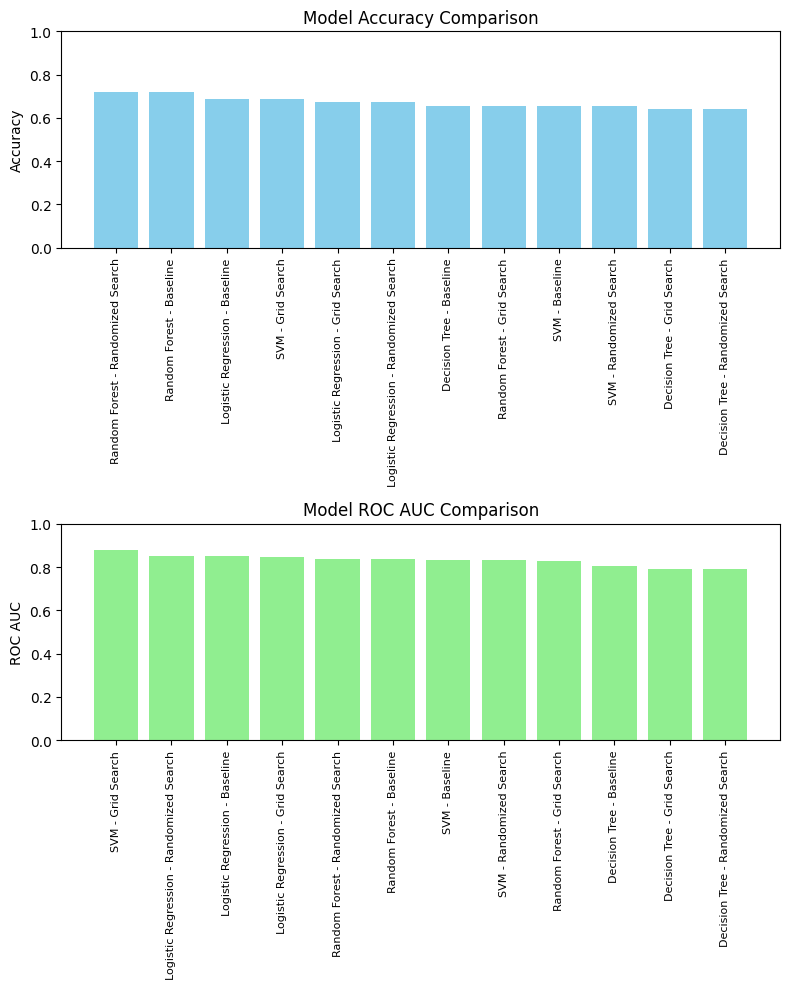

In [48]:
fig , (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

acc_sorted_metrics= metrics.sort_values(by='accuracy', ascending=False)
ax1.bar(acc_sorted_metrics.index, acc_sorted_metrics['accuracy'], color='skyblue')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.tick_params(axis='x', labelsize=8, labelrotation=90)
ax1.set_ylim(0, 1)

auc_sorted_metrics= metrics.sort_values(by='roc_auc', ascending=False)
ax2.bar(auc_sorted_metrics.index, auc_sorted_metrics['roc_auc'], color='lightgreen')
ax2.set_ylabel('ROC AUC')
ax2.set_title('Model ROC AUC Comparison')
ax2.tick_params(axis='x', labelsize=8, labelrotation=90)
ax2.set_ylim(0, 1)


plt.tight_layout()
plt.show()

## Save best model

In [15]:
# Use RandomForestClassifier for RFE estimator
rfe = RFE(estimator=RandomForestClassifier(random_state=30), n_features_to_select=7)

pipeline = Pipeline([
    ('scaler', StandardScaler()),           # Scaling
    ('pca', PCA(n_components=7)),           # PCA (adjust n_components as needed)
    ('feature_selection', rfe),  # Feature selection
    ('classifier', rand_rf.best_estimator_) 
])

pipeline.fit(X_train, y_train)

# Save pipeline
with open("../models/final_model.pkl", "wb") as f:
    pkl.dump(pipeline, f)